# Algoritmo Evolutivo Completo com DEAP, Rastrigin, Elitismo Simples e Classe Personalizada

Objetivo:

Criar um algoritmo evolutivo completo em Python usando a biblioteca DEAP para otimizar a função de Rastrigin, utilizando a classe personalizada MeuIndividuo e atendendo aos seguintes requisitos:

    Geração de Indivíduos:
        Genes em um array de 10 posições.
        Nomes aleatórios usando Faker.
    Plotagem de Gráfico:
        Aptidão (melhor e média) por geração.
    Parâmetros:
        População de 100 indivíduos.
        90% de chance de crossover.
        5% de chance de mutação.
        10 gerações.
    Elitismo Simples:
        Preservação do melhor indivíduo entre gerações.


--------- Generation 1 ---------
Indivíduo 0: Christine Martinez, Fitness: (4.0,)
Indivíduo 1: Vitor Hugo da Cunha, Fitness: (5.0,)
Indivíduo 2: Thiago Ferreira, Fitness: (6.0,)
Indivíduo 3: Enrico Ferreira, Fitness: (3.0,)
Indivíduo 4: Rhonda Wallace, Fitness: (5.0,)
Indivíduo 5: Andrew Vazquez, Fitness: (4.0,)
Indivíduo 6: Alan Hogan, Fitness: (1.0,)
Indivíduo 7: Jay Sawyer, Fitness: (6.0,)
Indivíduo 8: Jonathan Garcia, Fitness: (6.0,)
Indivíduo 9: Mariana Gomes, Fitness: (8.0,)
Indivíduo 10: Mary Lucero, Fitness: (3.0,)
Indivíduo 11: Cecília Cunha, Fitness: (8.0,)
Indivíduo 12: Luiz Fernando Aragão, Fitness: (3.0,)
Indivíduo 13: Michael Hernandez, Fitness: (3.0,)
Indivíduo 14: Kelly Perez, Fitness: (5.0,)
Indivíduo 15: Nicholas Torres, Fitness: (6.0,)
Indivíduo 16: Caleb Lopez, Fitness: (5.0,)
Indivíduo 17: Paige Rivera, Fitness: (4.0,)
Indivíduo 18: Kevin Edwards, Fitness: (6.0,)
Indivíduo 19: Robert Skinner, Fitness: (8.0,)

Dados da geração 1 : {'avg': 7.5, 'min': 6.0, 'max': 8.

,Generation,Best,Mean,Minimum,Maximum
0,1.0,8.000000,7.500000,6.000000,8.000000
1,2.0,12.289520,8.643428,8.000000,12.289520
2,3.0,26.392077,18.403942,8.000000,26.392077
3,4.0,46.302357,31.469647,26.392077,46.302357
4,5.0,48.651385,40.605919,26.392077,48.651385
...,...,...,...,...,...
95,96.0,90.855045,90.855045,90.855045,90.855045
96,97.0,90.855045,90.855045,90.855045,90.855045
97,98.0,90.855045,90.855045,90.855045,90.855045
98,99.0,90.855045,90.855045,90.855045,90.855045


[{'Nome': 'Mariana Gomes', 'Fitness': 8.0, 'Generation': 1}, {'Nome': 'Cecília Cunha', 'Fitness': 12.28952000220717, 'Generation': 2}, {'Nome': 'Robert Skinner', 'Fitness': 26.392076909727052, 'Generation': 3}, {'Nome': 'Robert Skinner', 'Fitness': 46.30235651995359, 'Generation': 4}, {'Nome': 'Robert Skinner', 'Fitness': 48.6513847822267, 'Generation': 5}, {'Nome': 'Robert Skinner', 'Fitness': 48.6513847822267, 'Generation': 6}, {'Nome': 'Robert Skinner', 'Fitness': 69.59573680436878, 'Generation': 7}, {'Nome': 'Robert Skinner', 'Fitness': 90.85504467686845, 'Generation': 8}, {'Nome': 'Robert Skinner', 'Fitness': 90.85504467686845, 'Generation': 9}, {'Nome': 'Robert Skinner', 'Fitness': 90.85504467686845, 'Generation': 10}, {'Nome': 'Robert Skinner', 'Fitness': 90.85504467686845, 'Generation': 11}, {'Nome': 'Robert Skinner', 'Fitness': 90.85504467686845, 'Generation': 12}, {'Nome': 'Robert Skinner', 'Fitness': 90.85504467686845, 'Generation': 13}, {'Nome': 'Robert Skinner', 'Fitness':

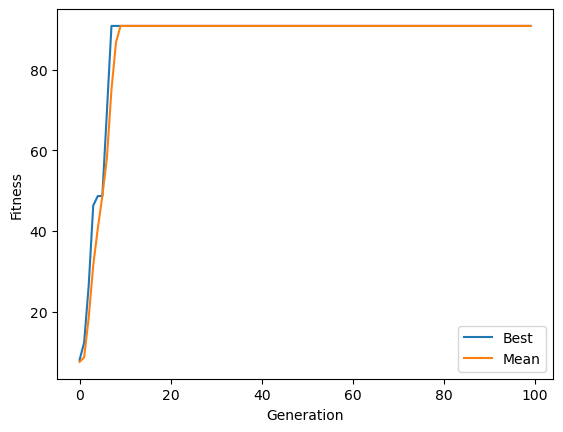

In [3]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

# Faker for names
fake = Faker(['en_US','pt_BR'])

used_names = set()

def generate_unique_name():
    while True:
        name = fake.name()
        if name not in used_names:
            used_names.add(name)
            return name
        
def initIndividual(genes):
    # Generate random genes of desired length
    genes = [random.randint(0,1) for _ in range(10)]
    return creator.Individual(genes=genes, name=generate_unique_name)


# Individual generator that includes unique name assignment
def create_unique_individual():
    individual = toolbox.individual()
    individual.genes = [random.randint(0,1) for _ in range(10)]
    individual.name = generate_unique_name()
    return individual


def evaluateInd(individual):
    return sum(individual),  

# Rastrigin function
def rastrigin(individual):
    A = 10
    n = len(individual)
    return A*n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in individual]),

# Constantes
POP_SIZE = 20  # Tamanho da população
CROSSOVER = 0.9  # Probabilidade de crossover
MUTATION = 0.05  # Probabilidade de mutação
GENERATIONS = 100  # Número de gerações
best_population = []
dados = {}


# Assuming you have already created the Fitness and Individual classes with DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, create_unique_individual, n=10)


# Evaluation
toolbox.register("evaluate", rastrigin)

# Genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Elitism
hof = tools.HallOfFame(1)




# Statistics
stats = tools.Statistics(key=lambda ind: ind.fitness.values[0])
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

def main():
    pop = toolbox.population(n=POP_SIZE)
   

    # Initialize fitness, generate names, and collect data
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        ind.name = fake.name()

    df = pd.DataFrame(columns=["Generation", "Best", "Mean", "Minimum", "Maximum"])

    # Evolution
    for gen in range(GENERATIONS):
        dados = {}
        print(f"\n--------- Generation {gen+1} ---------")

                # Imprime a população
        for ind_num, ind in enumerate(pop):
            print(f"Indivíduo {ind_num}: {ind.name}, Fitness: {ind.fitness.values}")

        # Elitism (update HOF and select best next generation)
        offspring = toolbox.select(pop, k=len(pop))
        offspring = list(map(toolbox.clone, offspring))
        pop = tools.selBest(pop + offspring, k=POP_SIZE)
        hof.update(pop)

        # Collect statistics
        stats_data = stats.compile(pop)
        print("\nDados da geração", gen+1, ":", stats_data)
        df.loc[gen] = [gen+1, stats_data["max"], stats_data["avg"], stats_data["min"], stats_data["max"]]

        # Crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if random.random() < MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate invalid individuals
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        print(f"\nBest individual: {hof.items[0].name}, Fitness: {hof.items[0].fitness.values[0]}  ")
        dados["Nome"] = hof.items[0].name
        dados["Fitness"] = hof.items[0].fitness.values[0]
        dados["Generation"] = gen+1

        best_population.append(dados)
    
    pop[:] = offspring



    # Results and plot
    display(df)
    print(best_population)
    print(used_names)

  
    

    plt.plot(df["Best"], label="Best")
    plt.plot(df["Mean"], label="Mean")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


## SOLID

In [2]:
from deap import base, creator, tools
import random
from faker import Faker

# Configuração inicial do Faker e DEAP
fake = Faker()
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

used_names = set()  # Conjunto para armazenar nomes já utilizados

def generate_unique_name():
    """Gera um nome único usando Faker."""
    while True:
        name = fake.name()
        if name not in used_names:
            used_names.add(name)
            return name

# Modifica a criação de indivíduos para incluir nomes únicos
def create_individual():
    individual = toolbox.individual()
    individual.name = generate_unique_name()  # Adiciona um nome único a cada indivíduo
    return individual

# Atualiza a função de registro para usar a nova função de criação de indivíduos
toolbox.register("individual_unique_name", create_individual)

# Exemplo de geração de uma população com nomes únicos
population = [toolbox.individual_unique_name() for _ in range(20)]
for ind in population:
    print(ind.name)

print(used_names)

Lauren Fisher
Kenneth Moss
Carolyn Thompson
Hannah Phillips
Melanie Parks
Thomas Sweeney
Tracy Dickerson
Thomas Li
Dakota Watts
Kathryn Riley
Cameron Williams
Daniel Lawson
Devin Vaughn
Adam Jacobs
Luis Cox
Robert Olsen
Anthony Fernandez
Fred Baker
Angela Duncan
Tracy Sanchez
{'Anthony Fernandez', 'Thomas Li', 'Luis Cox', 'Adam Jacobs', 'Tracy Sanchez', 'Kenneth Moss', 'Devin Vaughn', 'Robert Olsen', 'Kathryn Riley', 'Angela Duncan', 'Dakota Watts', 'Daniel Lawson', 'Cameron Williams', 'Hannah Phillips', 'Tracy Dickerson', 'Lauren Fisher', 'Thomas Sweeney', 'Melanie Parks', 'Carolyn Thompson', 'Fred Baker'}


/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
